In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
from sklearn import datasets,preprocessing
from sklearn.metrics import roc_curve,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [99]:
dataset=pd.read_csv('Logistic_Regression_Binary_Classsification_Churn_Data.csv')
df = pd.DataFrame(dataset)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
# x = dataset.iloc[:,7].values
# y = dataset.iloc[:,8].values
# print(y[:10])

# y = dataset['Churn'].replace('Yes', 1)
# y = y.replace('No', 0)
# y = y.iloc[:].values
# print(y[:10])

# dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})

le = preprocessing.LabelEncoder()

dataset['PhoneService']=le.fit_transform(dataset['PhoneService'])
dataset['Contract']=le.fit_transform(dataset['Contract'])
dataset['PaperlessBilling']=le.fit_transform(dataset['PaperlessBilling'])
dataset['PaymentMethod']=le.fit_transform(dataset['PaymentMethod'])
dataset['Churn']=le.fit_transform(dataset['Churn'])


dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.5,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


In [111]:
# dataset=dataset.drop(['customerID','PaperlessBilling','PaymentMethod'],axis=1)
# print(dataset.head())

# x=dataset.drop('Churn',axis=1)
# y=dataset.Churn
x= dataset.iloc[:,[1,2,3,4,5,6]].values
y=dataset.iloc[:,8].values


print(x[:5])
print(y[:5])




[[ 1.    0.    0.    1.    2.   29.85]
 [34.    1.    1.    0.    3.   56.95]
 [ 2.    1.    0.    1.    3.   53.85]
 [45.    0.    1.    0.    0.   42.3 ]
 [ 2.    1.    0.    1.    2.   70.7 ]]
[0 0 1 0 1]


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [113]:
x_test[:5]

array([[14.  ,  1.  ,  0.  ,  1.  ,  2.  , 20.05],
       [62.  ,  1.  ,  2.  ,  1.  ,  1.  , 20.05],
       [72.  ,  1.  ,  2.  ,  0.  ,  0.  , 88.05],
       [30.  ,  1.  ,  1.  ,  1.  ,  1.  , 68.95],
       [17.  ,  0.  ,  0.  ,  1.  ,  3.  , 25.65]])

In [116]:
regrassion = LogisticRegression()


In [117]:
regrassion.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
predictions = regrassion.predict(x_test)
predictions[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [119]:
regrassion.score(x_test,y_test)

0.7893242475865985

In [134]:
confusion_matrix(y_test, predictions)

array([[1149,  159],
       [ 212,  241]], dtype=int64)

In [125]:
precision_score(y_test,predictions)

0.6025

In [127]:
recall_score(y_test,predictions)

0.5320088300220751

In [129]:
f1_score(y_test, predictions)

0.5650644783118406

In [132]:
y_prediction_prob = regressor.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_prob)

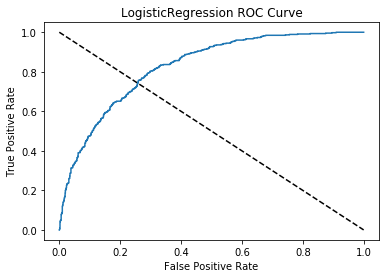

In [133]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()